In [27]:
# Importing essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_csv('titanic.csv')

# Display the first few rows of the dataset
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
# Check for missing values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

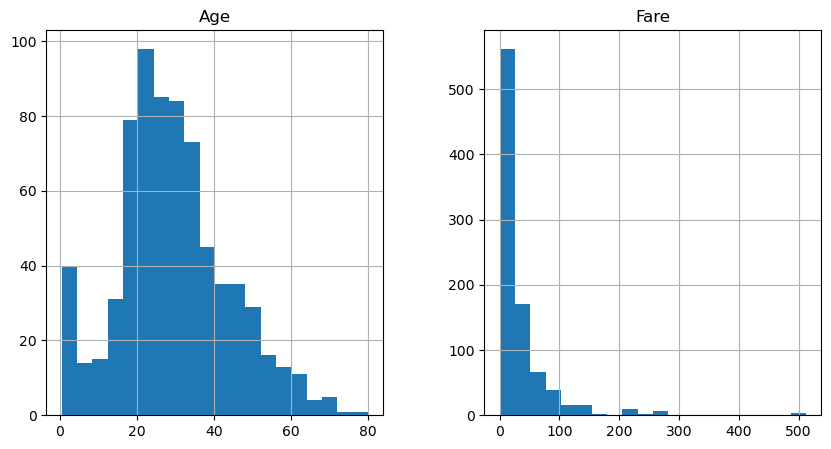

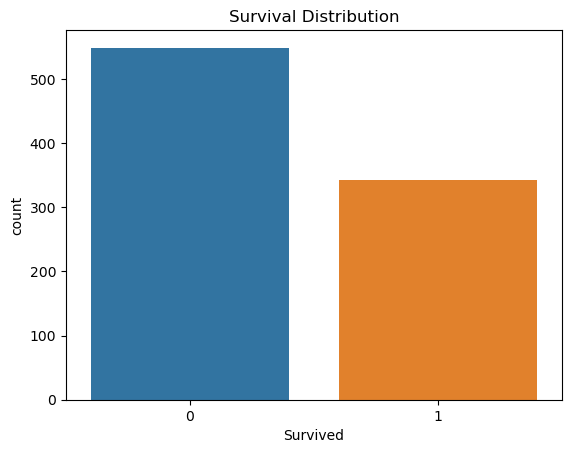

In [43]:
# Visualizing the distribution of numerical features
data[['Age', 'Fare']].hist(bins=20, figsize=(10, 5))
plt.show()

# Visualizing the count of categorical features
sns.countplot(x='Survived', data=data)
plt.title('Survival Distribution')
plt.show()


In [44]:
# Handle missing values for numerical columns using SimpleImputer
imputer = SimpleImputer(strategy='median')
data['Age'] = imputer.fit_transform(data[['Age']])
data['Fare'] = imputer.fit_transform(data[['Fare']])

# Impute missing values for categorical columns using SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
data['Embarked'] = imputer.fit_transform(data[['Embarked']]).ravel()  # Use ravel() to flatten the result to a 1D array

# Convert 'Sex' and 'Embarked' columns to numerical values using LabelEncoder
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['Embarked'] = label_encoder.fit_transform(data['Embarked'])

# Optional: Feature scaling (especially for SVM and Logistic Regression)
scaler = StandardScaler()
data[['Age', 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])

# Check the cleaned data
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,-0.565736,1,0,A/5 21171,-0.502445,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",0,0.663861,1,0,PC 17599,0.786845,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,-0.258337,0,0,STON/O2. 3101282,-0.488854,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.433312,1,0,113803,0.420730,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,0.433312,0,0,373450,-0.486337,NaN,2


In [10]:
# Split the data into features (X) and target (y)
X = data.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin', 'PassengerId'])
y = data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Trained successfully")

In [20]:
#model training
# Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Evaluate the model
y_pred = logreg.predict(X_test)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

# Random Forest Classifier model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
y_pred = rf.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


# SVM model
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

# Evaluate the model
y_pred = svm.predict(X_test)
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

# Decision Tree Classifier model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Evaluate the model
y_pred = dt.predict(X_test)
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Random Forest Accuracy: 0.8156424581005587
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179

SVM Accuracy: 0.7821229050279329
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   

In [14]:
# Hyperparameter tuning with GridSearchCV for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the best model
y_pred = grid_search.best_estimator_.predict(X_test)
print(f"Best Random Forest Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


Best Hyperparameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Best Random Forest Accuracy: 0.8379888268156425
              precision    recall  f1-score   support

           0       0.83      0.90      0.87       105
           1       0.85      0.74      0.79        74

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179



In [15]:
# Final Model Evaluation
final_model = grid_search.best_estimator_
y_pred = final_model.predict(X_test)

# Print final accuracy
print(f"Final Model Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


Final Model Accuracy: 0.8379888268156425
              precision    recall  f1-score   support

           0       0.83      0.90      0.87       105
           1       0.85      0.74      0.79        74

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179



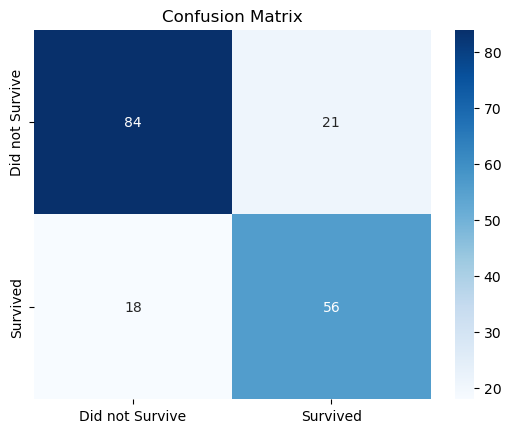

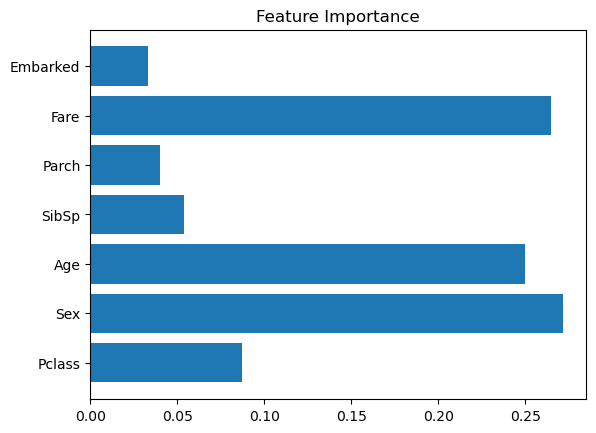

In [46]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Did not Survive', 'Survived'],
            yticklabels=['Did not Survive', 'Survived'])
plt.title("Confusion Matrix")
plt.show()

# Feature Importance for Random Forest
feature_importances = rf.feature_importances_
features = X.columns
plt.barh(features, feature_importances)
plt.title("Feature Importance")
plt.show()


In [40]:
# Preprocessing function to ensure the same transformation for both train and test data
def preprocess_data(data):
    # Drop columns that are not useful for the model
    data = data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
    
    # Handle missing values (you can impute or drop, depending on the preprocessing strategy used for training)
    data['Age'].fillna(data['Age'].mean(), inplace=True)  # Example: filling missing age with the mean
    data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)  # Filling missing embarked with the most frequent value
    data['Fare'].fillna(data['Fare'].mean(), inplace=True)  # Filling missing Fare with the mean
    
    # Convert categorical columns (e.g., 'Sex', 'Embarked') into numerical values
    data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
    data['Embarked'] = data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
    
    # You can also apply any other transformations here (e.g., normalization, encoding, etc.)
    
    # Return the processed data
    return data

# Load the test data
test_data = pd.read_csv('test.csv')

# Preprocess the test data
test_data_processed = preprocess_data(test_data)

# Ensure the test data has the same features in the same order as the training data
# Assuming your training data was already preprocessed and stored in 'train_data_processed'
test_data_processed = test_data_processed[test_data_processed.columns]

# Make predictions using the trained model
predictions = final_model.predict(test_data_processed)

# Create a DataFrame with predictions
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': predictions
})

# Save the predictions to a CSV file for submission
submission.to_csv('submission.csv', index=False)
print("Exported successfully.")